# Part 2: Cost of Living

In [39]:
import numpy as np
import pandas as pd
import re
import calendar

import seaborn as sns
import matplotlib.style as style

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

style.use('fivethirtyeight')

In [40]:
df = pd.read_csv('./data/all_jobs.csv')
salary_df = pd.read_csv('./data/only_salary_jobs.csv')

### About Cost of Living Indices

These indices are relative to New York City (NYC). Which means that for New York City, each index should be 100(%). If another city has, for example, rent index of 120, it means that on an average in that city rents are 20% more expensive than in New York City. If a city has rent index of 70, that means on average rent in that city is 30% less expensive than in New York City.

**Cost of Living Index (Excl. Rent)** is a relative indicator of consumer goods prices, including groceries, restaurants, transportation and utilities. Cost of Living Index does not include accommodation expenses such as rent or mortgage. If a city has a Cost of Living Index of 120, it means Numbeo has estimated it is 20% more expensive than New York (excluding rent).

**Rent Index** is an estimation of prices of renting apartments in the city compared to New York City. If Rent index is 80, Numbeo has estimated that price of rents in that city is on average 20% less than the price in New York.

**Groceries Index** is an estimation of grocery prices in the city compared to New York City. To calculate this section, Numbeo uses weights of items in the "Markets" section for each city.

**Restaurants Index** is a comparison of prices of meals and drinks in restaurants and bars compared to NYC.

**Cost of Living Plus Rent Index** is an estimation of consumer goods prices including rent comparing to New York City.

**Local Purchasing Power** shows relative purchasing power in buying goods and services in a given city for the average net salary in that city. If domestic purchasing power is 40, this means that the inhabitants of that city with an average salary can afford to buy on an average 60% less goods and services than New York City residents with an average salary.

*Source: [numbeo.com](https://www.numbeo.com/cost-of-living/cpi_explained.jsp)*


In [41]:
cost_living_df = pd.read_csv('./data/cost_of_living_mid_2020.csv')

In [42]:
cost_living_df.drop(columns=['Unnamed: 0', 'Rank'], inplace = True)
cost_living_df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,New York NY United States,100.00,100.00,100.00,100.00,100.00,100.00
1,San Francisco CA United States,92.13,109.76,100.72,89.79,88.26,139.00
2,Anchorage AK United States,90.83,36.51,64.38,89.86,75.91,119.91
3,Nassau Bahamas,89.57,38.57,64.73,76.56,83.50,45.96
4,Oakland CA United States,88.68,79.83,84.37,94.92,72.03,97.98


In [43]:
def united_states_only_func(col, df):
    """
    Chooses only United States cities.
    """
    temp = df[df[col].str.contains('United States', regex=False, case=False, na=False)]
    # Get rif of word 'United States' before returning df
    temp['City'] = temp['City'].str.strip('United States')
    return temp

In [44]:
us_cost_living_df = united_states_only_func('City', cost_living_df)

In [45]:
us_cost_living_df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,New York NY,100.00,100.00,100.00,100.00,100.00,100.00
1,Francisco CA,92.13,109.76,100.72,89.79,88.26,139.00
2,Anchorage AK,90.83,36.51,64.38,89.86,75.91,119.91
4,Oakland CA,88.68,79.83,84.37,94.92,72.03,97.98
5,Boston MA,88.61,75.13,82.05,89.28,84.34,107.59


In [46]:
# Cleaning some names
import warnings
warnings.filterwarnings("ignore")
us_cost_living_df['City'] = us_cost_living_df['City'].replace('Francisco CA', 'San Francisco CA')
us_cost_living_df['City'] = us_cost_living_df['City'].replace('cramento CA', 'Sacramento CA')
us_cost_living_df['City'] = us_cost_living_df['City'].replace('le WA', 'Seattle WA')
us_cost_living_df['City'] = us_cost_living_df['City'].replace('Jose CA', 'San Jose CA')
us_cost_living_df['City'] = us_cost_living_df['City'].replace('Diego CA', 'San Diego CA')
us_cost_living_df['City'] = us_cost_living_df['City'].replace('pokane WA', 'Spokane WA')
us_cost_living_df['City'] = us_cost_living_df['City'].replace('lt Lake City UT', 'Salt Lake City UT')
us_cost_living_df['City'] = us_cost_living_df['City'].replace('Wichita K', 'Wichita KS')
us_cost_living_df['City'] = us_cost_living_df['City'].replace('Antonio TX', 'San Antonio TX')

In [47]:
us_cost_living_df['City'].unique()

array(['New York NY', 'San Francisco CA', 'Anchorage AK', 'Oakland CA',
       'Boston MA', 'Seattle WA', 'Honolulu HI', 'Washington DC',
       'Miami FL', 'Charleston SC', 'Minneapolis MN', 'Chicago IL',
       'Fort Lauderdale FL', 'Portland OR', 'Irvine CA', 'Los Angeles CA',
       'Philadelphia PA', 'Pittsburgh PA', 'Cleveland OH', 'Milwaukee WI',
       'Sacramento CA', 'San Diego CA', 'Asheville NC', 'San Jose CA',
       'New Orleans LA', 'Birmingham AL', 'Tampa FL', 'Atlanta GA',
       'Charlotte NC', 'Baltimore MD', 'Ann Arbor MI', 'Rochester NY',
       'Denver CO', 'Spokane WA', 'Columbus OH', 'Albany NY',
       'Colorado Springs CO', 'Knoxville TN', 'Orlando FL',
       'Nashville TN', 'Buffalo NY', 'Olympia WA', 'Kansas City MO',
       'Jacksonville FL', 'Raleigh NC', 'Detroit MI', 'Tucson AZ',
       'Eugene OR', 'Reno NV', 'Richmond VA', 'Las Vegas NV',
       'Louisville KY', 'Houston TX', 'Toledo OH', 'Des Moines IA',
       'San Antonio TX', 'Phoenix AZ', 'Tulsa 

In [48]:
# temp = np.array([
#     'NY',
#     'CA',
#     'AK',
#     'MA',
#     'WA',
#     'HI', 
#     'Washington DC',
#     'FL',
#     'SC',
#     'MN',
#     'IL',
#     'OR',
#     'PA',
#     'OH',
#     'WI',
#     'NC',
#     'LA',
#     'GA',
#     'MD',
#     'MI',
#     'CO',
#     'WA',
#     'TN',
#     'MO',
#     'AZ',
#     'NV',
#     'VA',
#     'KY',
#     'TX',
#     'OH',
#     'IA',
#     'OK',
#     'WI',
#     'UT',
#     'IN',
#     'AR',
#     'NM',
#     'AL',
#     'KS',
#     'ID',
#     'TX'
# ])

In [49]:
# states_us = np.unique(temp)

In [50]:
# salary_df['location'].str.split().str[-1].unique()

In [51]:
salary_df['location']  = salary_df['location'].apply(lambda x: x.replace(',', ''))

In [52]:
(us_cost_living_df.columns, salary_df.columns)

(Index(['City', 'Cost of Living Index', 'Rent Index',
        'Cost of Living Plus Rent Index', 'Groceries Index',
        'Restaurant Price Index', 'Local Purchasing Power Index'],
       dtype='object'),
 Index(['Unnamed: 0', 'job_title', 'salary', 'company', 'location', 'is_remote',
        'job_rating', 'job_summary', 'post_date', 'extract_date', 'job_url',
        'rate_by', 'min', 'max', 'adjusted_salary', 'yearly_adjusted_salary',
        'salary_bins'],
       dtype='object'))

In [53]:
(full_df.shape, salary_df.shape, us_cost_living_df.shape)

((1520, 24), (1520, 17), (72, 7))

In [54]:
full_df = salary_df.merge(us_cost_living_df, left_on='location', right_on='City', how = 'left')
# df = salary_df.merge(COI, left_on='Location2', right_on='City', how = 'left')
full_df.head()

,Unnamed: 0,job_title,salary,company,location,is_remote,job_rating,job_summary,post_date,extract_date,...,adjusted_salary,yearly_adjusted_salary,salary_bins,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,5,Data Scientist Intern,$18 an hour,Hach,New York NY,NaN,3.2,"Parameters like pH, alkalinity, disinfectant c...",2 days ago,2021-01-15,...,18.0,43992.0,0 - 100K,New York NY,100.0,100.0,100.0,100.0,100.0,100.0
1,16,Data Scientist,"$88,656 - $222,212 a year",PebblePost,New York NY,Temporarily remote,NaN,Expertise in machine learning techniques.\nArc...,7 days ago,2021-01-15,...,155434.0,155434.0,100K - 200K,New York NY,100.0,100.0,100.0,100.0,100.0,100.0
2,89,Search Engine Marketing Data Scientist (Specia...,"$80,000 - $135,000 a year",Think Green Supplies LLC,New York NY,NaN,NaN,Experience in data science with a focus on mar...,30+ days ago,2021-01-15,...,107500.0,107500.0,100K - 200K,New York NY,100.0,100.0,100.0,100.0,100.0,100.0
3,130,Data Scientist,"$130,000 - $160,000 a year",Universal Yums LLC,Roseland NJ,Temporarily remote,NaN,We need a data expert with experience in softw...,23 days ago,2021-01-15,...,145000.0,145000.0,100K - 200K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,153,Data Science Resident,$35 an hour,Galvanize,New York NY,NaN,3.8,"As part of the Residency program, you will rec...",30+ days ago,2021-01-15,...,35.0,85540.0,0 - 100K,New York NY,100.0,100.0,100.0,100.0,100.0,100.0


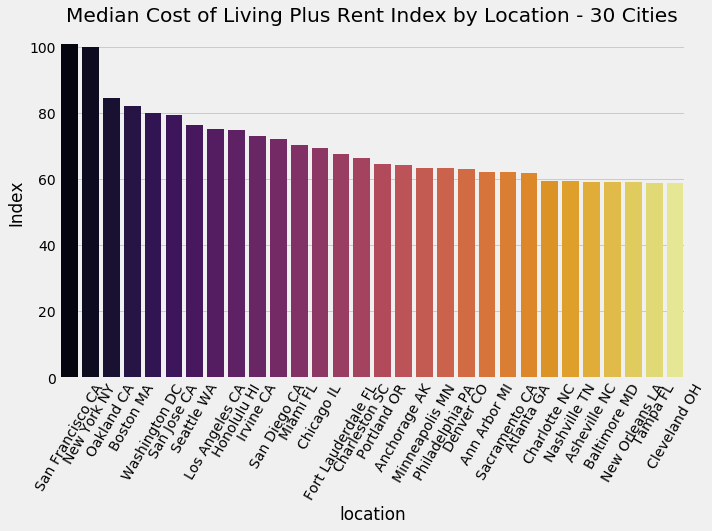

In [55]:
plt.figure(figsize=(10, 6))

city_COI = full_df.groupby('location')['Cost of Living Plus Rent Index'].median().sort_values(ascending=False)[:30]
sns.barplot(x = city_COI.index, y = city_COI.values, palette = 'inferno')
plt.xticks(rotation='60')
plt.ylabel("Index")

plt.title("Median Cost of Living Plus Rent Index by Location - 30 Cities");

In [56]:
(len(salary_df['location']), len(us_cost_living_df['City']))

(1520, 72)

In [57]:
full_df.to_csv('./data/combined_data.csv')
us_cost_living_df.to_csv('./data/us_cost_living.csv')